In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv('data_csv.csv')

In [20]:
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,LTU,2012,28.942,1.820,448.728,NaN,1340.70
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02
1033,LTU,2014,27.836,1.724,485.245,NaN,1422.92
1034,LTU,2015,26.784,1.745,504.422,NaN,1465.30


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


In [49]:
df.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,1996.809846,16.406307,1.170948,295.046989,11765.423118
std,12.498330,6.389064,0.465635,209.152134,34878.286123
min,1970.000000,5.545000,0.207000,3.160000,6.290000
25%,1987.000000,11.516250,0.768250,111.098500,728.180000
50%,1999.000000,14.967500,1.141500,266.332000,2349.570000
75%,2007.000000,20.590500,1.523250,446.109500,7778.180000
max,2016.000000,40.239000,2.797000,1162.399000,373009.910000


<Figure size 300x300 with 0 Axes>

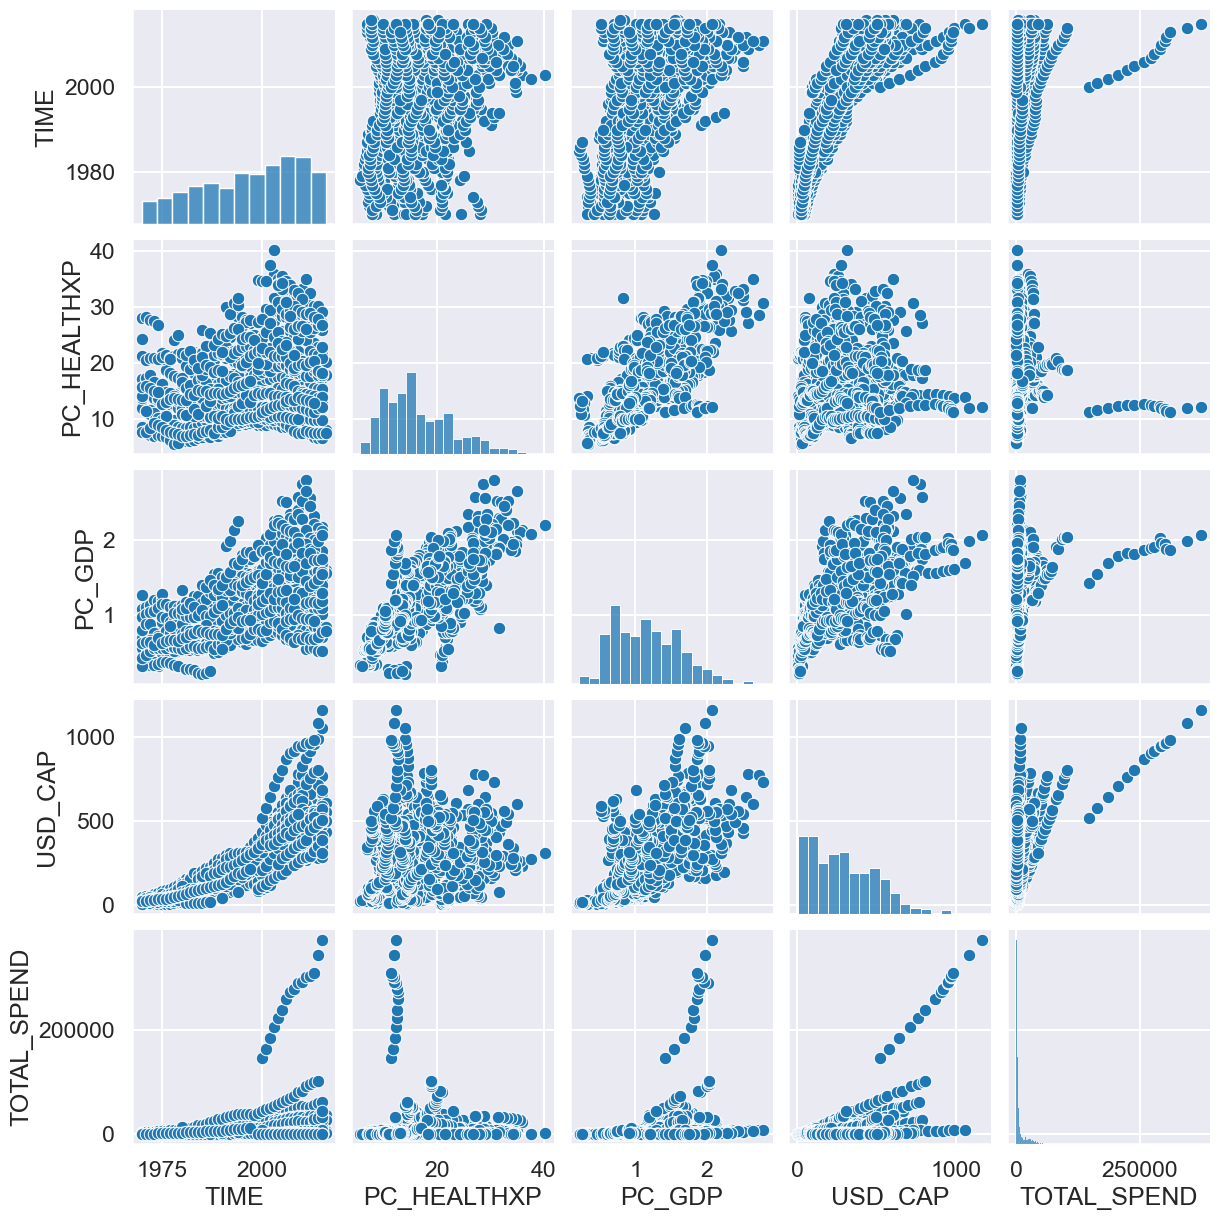

In [121]:
plt.figure(figsize=(3,3))
sns.pairplot(df)
plt.show()
# We can see some correlations in this set of graphs

In [50]:
import plotly.express as px
fig = px.line(df, x='TIME', y='TOTAL_SPEND', color='LOCATION')
fig.show()
# there is a clear increase in money spent over the years in every country. Portugal and Greece started declining after 2010.

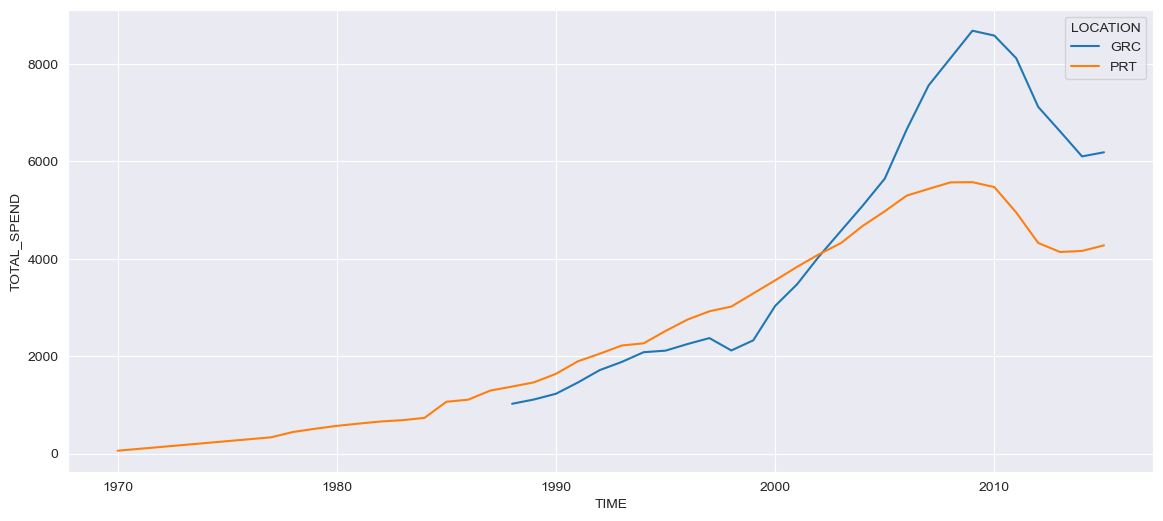

In [52]:
grcprt = df[df['LOCATION'].isin(['PRT', 'GRC'])]
plt.figure(figsize=(14,6))
sns.lineplot(data=grcprt, x='TIME', y='TOTAL_SPEND', hue='LOCATION')
plt.show()

In [46]:
# using seaborn in case github does not show the interactive graph.

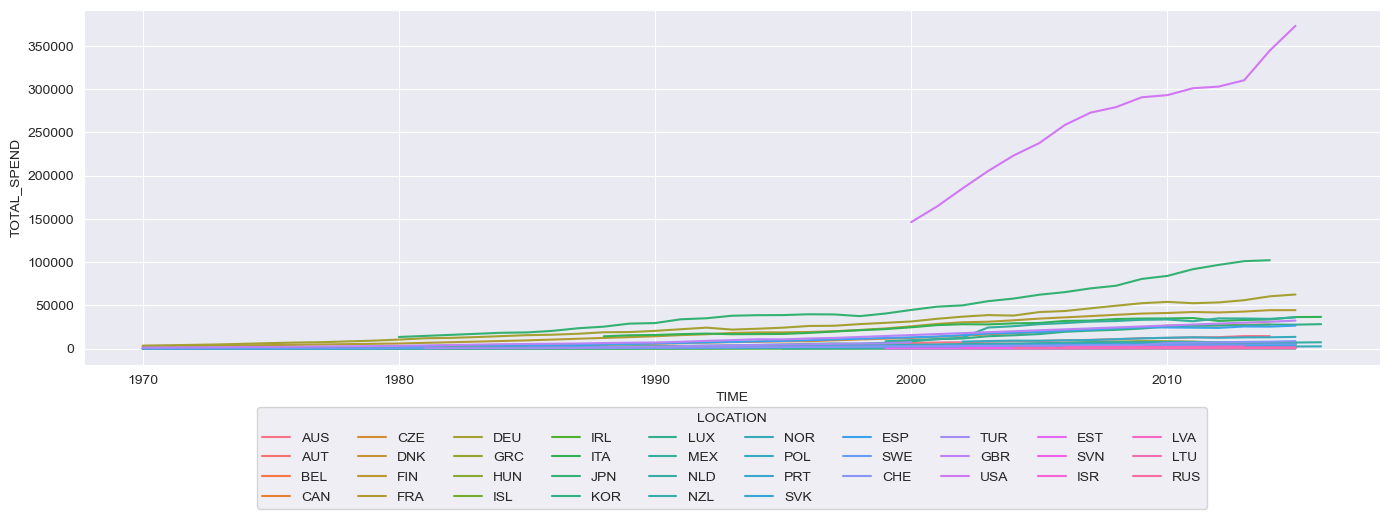

In [45]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
lineplot = sns.lineplot(data=df, x='TIME', y='TOTAL_SPEND', hue='LOCATION')
num_items_per_row = 10
num_legend_rows = -(-len(df['LOCATION'].unique()) // num_items_per_row)
plt.legend(title='LOCATION', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=num_items_per_row)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [38]:
print(df.loc[df['TOTAL_SPEND'].idxmax()])

LOCATION             USA
TIME                2015
PC_HEALTHXP       12.227
PC_GDP             2.068
USD_CAP         1162.399
FLAG_CODES           NaN
TOTAL_SPEND    373009.91
Name: 971, dtype: object


In [123]:
# checking correlation between the years and PC_HEALTHXP

In [124]:
fig = px.line(df, x='TIME', y='PC_HEALTHXP', color='LOCATION')

fig.update_layout(
    title='Correlation between Time and PC Health Expenditure by Location',
    xaxis_title='Time',
    yaxis_title='PC Health Expenditure',
    legend_title='Location'
)

fig.show()

# No apparent correlation


In [ ]:
# Plotting the correlation between USD Cap and PC GDP, since the original pairplot indicated a good correlation between those two.

In [125]:
fig = px.line(df, x='USD_CAP', y='PC_GDP', color='LOCATION')

fig.update_layout(
    title='Correlation between USD Cap and PC GDP by Location',
    xaxis_title='USD Cap',
    yaxis_title='PC GDP',
    legend_title='Location'
)
fig.show()

<Figure size 1200x800 with 0 Axes>

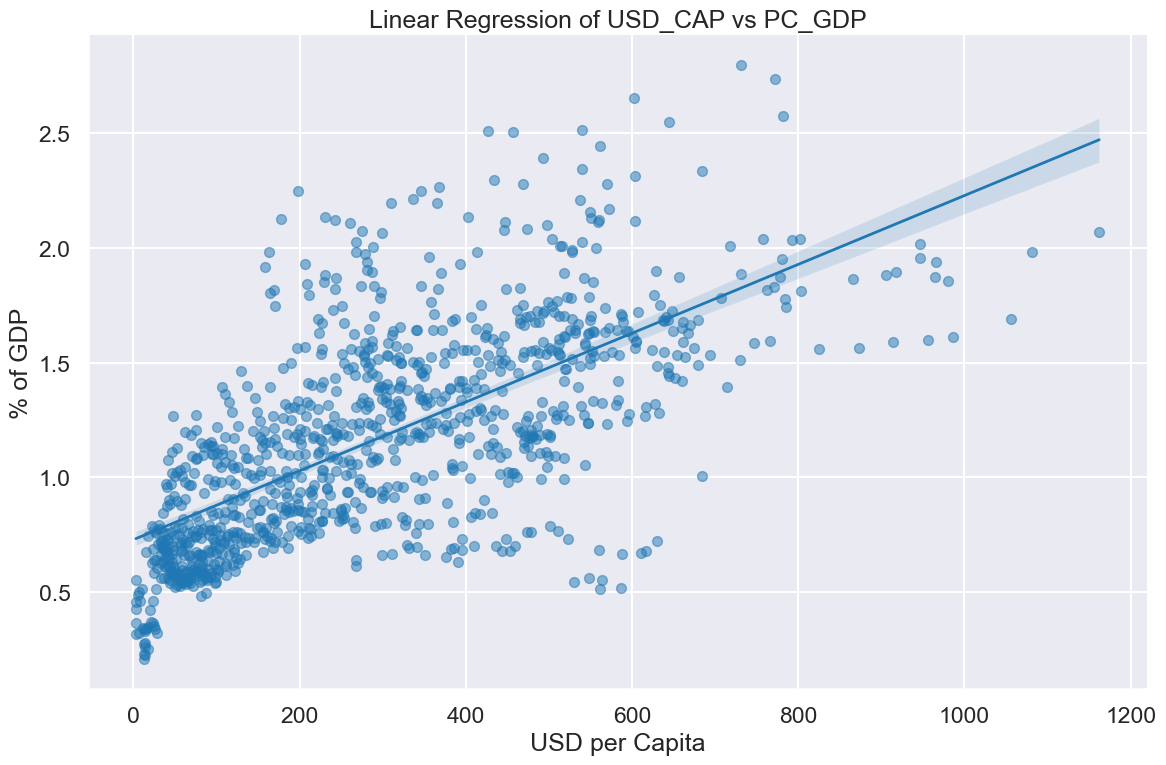

In [134]:
plt.figure(figsize=(12,8))

sns.lmplot(data=df, x='USD_CAP', y='PC_GDP', 
           height=8, aspect=1.5, 
           scatter_kws={'s': 50, 'alpha': 0.5},
           line_kws={'lw': 2})  
plt.xlabel('USD per Capita')
plt.ylabel('% of GDP')
plt.title('Linear Regression of USD_CAP vs PC_GDP')

plt.tight_layout()
plt.show()